In [1]:
#Importing packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the dataset
dataset=pd.read_excel("E-com_Data.xlsx")

In [3]:
dataset.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN


In [4]:
dataset.shape

(537979, 12)

In [5]:
#Information of the Dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   Item Code          537979 non-null  object        
 2   InvoieNo           537979 non-null  int64         
 3   Date of purchase   537979 non-null  datetime64[ns]
 4   Quantity           537979 non-null  int64         
 5   Time               537979 non-null  object        
 6   price per Unit     537979 non-null  float64       
 7   Price              537979 non-null  float64       
 8   Shipping Location  537979 non-null  object        
 9   Cancelled_status   8345 non-null    float64       
 10  Reason of return   3 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 49.3+ MB


In [6]:
#Number of unique#Basically to see the unique values in Customer_id
dataset.nunique()

CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        3479
Price                16327
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
dtype: int64

In [7]:
#Data Preprocessing
## Checking Missing Data
dataset.isnull().sum()

CustomerID           133790
Item Code                 0
InvoieNo                  0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     529634
Reason of return     537976
Sold as set          537979
dtype: int64

In [8]:
#Total percent  missing
dataset.isnull().sum()/len(dataset) *100   

CustomerID            24.869000
Item Code              0.000000
InvoieNo               0.000000
Date of purchase       0.000000
Quantity               0.000000
Time                   0.000000
price per Unit         0.000000
Price                  0.000000
Shipping Location      0.000000
Cancelled_status      98.448824
Reason of return      99.999442
Sold as set          100.000000
dtype: float64

In [9]:
#we will drop missing data (row wise)

#Data Cleaning-Duplicate data(row wise,checking basically Invoice No is duplicated or not)
dataset.loc[dataset.duplicated(),:]

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
61202,4043.0,15819,403353,2017-12-02,1,14:07:00,447.0,447.0,Location 36,NaN,NaN,NaN
70587,3984.0,15422,405579,2017-12-09,24,14:09:00,77.0,1848.0,Location 36,NaN,NaN,NaN
84823,3828.0,14519,398139,2017-10-31,1,14:04:00,85.0,85.0,Location 36,NaN,NaN,NaN
120521,3384.0,15121,380588,2017-06-11,1,11:37:00,298.0,298.0,Location 36,NaN,NaN,NaN
182786,2607.0,15660,393225,2017-09-30,1,12:31:00,484.0,484.0,Location 36,NaN,NaN,NaN
248215,1852.0,15614,382863,2017-07-02,12,09:53:00,221.0,2652.0,Location 36,NaN,NaN,NaN
310310,1291.0,13958,368695,2017-02-14,2,16:17:00,298.0,596.0,Location 36,NaN,NaN,NaN
325175,1076.0,2020,405755,2017-12-13,12,15:48:00,58.0,696.0,Location 36,NaN,NaN,NaN
414854,NaN,2020,386281,2017-07-31,1,17:09:00,104.0,104.0,Location 36,NaN,NaN,NaN


In [11]:
dataset.head(20)#We can observe 1st and 2nd row customer is same,different item code and different date but invoice no is same

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN
5,4349.0,14618,397122,2017-10-27,1,12:43:00,256.0,256.0,Location 1,NaN,NaN,NaN
6,4343.0,15364,368432,2017-02-13,-4,14:46:00,922.0,-3688.0,Location 1,1.0,NaN,NaN
7,4341.0,85014B,377109,2017-05-14,3,09:22:00,677.0,2031.0,Location 1,NaN,NaN,NaN
8,4341.0,85014A,377109,2017-05-12,3,09:22:00,692.0,2076.0,Location 1,NaN,NaN,NaN
9,4341.0,85014B,390217,2017-09-07,6,14:47:00,670.0,4020.0,Location 1,NaN,NaN,NaN


In [12]:
#dropping the duplicates
dataset=dataset.drop_duplicates(ignore_index=True)

In [13]:
dataset.shape#9 rows got dropped

(537970, 12)

In [14]:
dataset.isnull().sum()

CustomerID           133789
Item Code                 0
InvoieNo                  0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     529625
Reason of return     537967
Sold as set          537970
dtype: int64

In [15]:
#Dropping customer where there is NA
dataset=dataset.dropna(subset=['CustomerID'])

In [16]:
dataset.shape#133789 Customer Ids got dropped row wise

(404181, 12)

In [17]:
#dataset['Date']=pd.to_datetime(dataset['Date of purchase'])

In [18]:
#dataset.head()

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404181 entries, 0 to 537940
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404181 non-null  float64       
 1   Item Code          404181 non-null  object        
 2   InvoieNo           404181 non-null  int64         
 3   Date of purchase   404181 non-null  datetime64[ns]
 4   Quantity           404181 non-null  int64         
 5   Time               404181 non-null  object        
 6   price per Unit     404181 non-null  float64       
 7   Price              404181 non-null  float64       
 8   Shipping Location  404181 non-null  object        
 9   Cancelled_status   8183 non-null    float64       
 10  Reason of return   0 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 40.1+ MB


In [18]:
dataset=dataset.iloc[:,0:9]

In [19]:
dataset['Date'] = pd.to_datetime(dataset['Date of purchase']) #Date to find Recency
dataset['Date_1'] = dataset['Date']#Date to find the frequency 

In [20]:
dataset.head(2)

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Date,Date_1
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,2017-10-29,2017-10-29
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,2017-10-05,2017-10-05


In [21]:
# Objective : Build an unsupervised learning model which can enable your 
# company to analyze their customers via RFM (Recency, Frequency and Monetary value) approach.

#Recency =Latest Date(today or latest date in dataset)-last invoice date

#Frequency= Number of invoice number of the transaction done by customers

#Monetary= Sum of amounts purchased by customer(ie Total Amount)

max(dataset['Date of purchase'])#Last date 

Timestamp('2017-12-19 00:00:00')

In [22]:
min(dataset['Date of purchase'])

Timestamp('2016-12-02 00:00:00')

In [23]:
#Last date=Timestamp('2017-12-19 00:00:00')
#Latest Date=2017-12-20

import datetime as dt
Latest_Date=dt.datetime(2017,12,20)

In [24]:
Latest_Date

datetime.datetime(2017, 12, 20, 0, 0)

In [25]:
df_recency = dataset.groupby(['CustomerID'],as_index=False)['Date of purchase'].max()
df_recency.columns = ['CustomerID','Last_Purchase_Date']
df_recency['Recency'] = (Latest_Date - df_recency['Last_Purchase_Date']).dt.days
df_recency.drop(columns=['Last_Purchase_Date'],inplace=True)
FM_Table = dataset.groupby('CustomerID').agg({'InvoieNo'   : lambda x:len(x),'Price'  : lambda x:x.sum()})
FM_Table.rename(columns = {'InvoieNo' :'Frequency','Price':'Monetary_Value'},inplace= True)
RFM_Table = df_recency.merge(FM_Table,left_on='CustomerID',right_on='CustomerID')

In [26]:
RFM_Table

,CustomerID,Recency,Frequency,Monetary_Value
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,19,72,176613.0
3,5.0,311,16,41976.0
4,6.0,37,84,151822.0
...,...,...,...,...
4344,4368.0,278,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,9,13,24962.0
4347,4371.0,4,754,280608.0


In [26]:
#Create RMF model by each customer


#RMFScore=dataset.groupby('CustomerID').agg({'Date_1':lambda x:(Latest_Date-x.max()).days,
                                            'Date': lambda x:x.count(),
                                             'Price':lambda x: x.sum()})#x.max()-->System Transaction date

In [27]:
#RMFScore ['Date']=RMFScore['Date'].astype(int)
#RMFScore.rename(columns={'Date_1':'Recency','Date':'Frequency','Price':'Monetary'},inplace=True)
#RMFScore.reset_index().head(100) #resetting so that it will come in sequence order#Customer ID coming as 2,3,4...becuase
#we have 4349 unique customers and that many numbers come and we did group by in the above step

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,19,72,176613.0
3,5.0,311,16,41976.0
4,6.0,37,84,151822.0
...,...,...,...,...
95,97.0,49,83,160470.0
96,98.0,11,22,99624.0
97,99.0,10,49,87593.0
98,100.0,147,38,85253.0


In [27]:
#EDA
RFM_Table.Recency.describe()

count    4349.000000
mean       93.299379
std       100.701315
min         1.000000
25%        18.000000
50%        51.000000
75%       144.000000
max       381.000000
Name: Recency, dtype: float64

In [28]:
#Split the data into 4 segments using quantile method
quantiles=RFM_Table.quantile(q=[0.25,0.50,0.75])
quantiles=quantiles.to_dict()
#Using quantiles
#Recency=25-less than 25% is good customer
#Frequency-75-above is good customer
#Monetary-75-above is good customer

In [29]:
quantiles

{'CustomerID': {0.25: 1095.0, 0.5: 2186.0, 0.75: 3279.0},
 'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetary_Value': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

In [30]:
#Create own function to define R,F and M Segment

def RScoring(x,p,d):#As R less then its better,d-->dataset,p-->percentile value
    if x<=d[p][0.25]:
        return 1 #good
    elif x<=d[p][0.50]:
        return 2#moderate
    elif x<=d[p][0.75]:
        return 3#Bad
    else:
        return 4#worst

def FnMScoring(x,p,d):#as F and M more then its better
    if x<=d[p][0.25]:
        return 4#good
    elif x<=d[p][0.50]:
        return 3#moderate
    elif x<=d[p][0.75]:
        return 2#bad
    else:
        return 1#worst

In [31]:
RFM_Table.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary_Value'], dtype='object')

In [35]:
RFM_Table['R']=RFM_Table['Recency'].apply(RScoring,args=('Recency',quantiles,))#x='Recency',p= quantiles and d=RMFScore['Recency']
RFM_Table['F']=RFM_Table['Frequency'].apply(FnMScoring,args=('Frequency',quantiles,))
RFM_Table['M']=RFM_Table['Monetary_Value'].apply(FnMScoring,args=('Monetary_Value',quantiles,))

In [36]:
RFM_Table.head(20)

,CustomerID,Recency,Frequency,Monetary_Value,R,F,M
0,2.0,4,182,553704.0,1,1,1
1,3.0,77,27,257404.0,3,3,1
2,4.0,19,72,176613.0,2,2,2
3,5.0,311,16,41976.0,4,4,3
4,6.0,37,84,151822.0,2,2,2
5,7.0,208,4,9410.0,4,4,4
6,8.0,233,58,135550.0,4,2,2
7,9.0,215,13,65832.0,4,4,3
8,10.0,25,58,331601.0,2,2,1
9,11.0,34,131,771439.0,2,1,1


In [35]:
#2.0	4	63	553704.0	1	1	1--> New Customer and Prime customer

In [37]:
RFM_Table.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary_Value', 'R', 'F', 'M'], dtype='object')

In [38]:
RFM_Table['RMFGroup']=RFM_Table.R.map(str) + RFM_Table.F.map(str) + RFM_Table.M.map(str) #creating unique number for each type of cust

In [39]:
RFM_Table['RMFGroup'] = RFM_Table['RMFGroup']. astype(int)

In [40]:
RFM_Table.head(10)

,CustomerID,Recency,Frequency,Monetary_Value,R,F,M,RMFGroup
0,2.0,4,182,553704.0,1,1,1,111
1,3.0,77,27,257404.0,3,3,1,331
2,4.0,19,72,176613.0,2,2,2,222
3,5.0,311,16,41976.0,4,4,3,443
4,6.0,37,84,151822.0,2,2,2,222
5,7.0,208,4,9410.0,4,4,4,444
6,8.0,233,58,135550.0,4,2,2,422
7,9.0,215,13,65832.0,4,4,3,443
8,10.0,25,58,331601.0,2,2,1,221
9,11.0,34,131,771439.0,2,1,1,211


In [41]:
RFM_Table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4349 entries, 0 to 4348
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      4349 non-null   float64
 1   Recency         4349 non-null   int64  
 2   Frequency       4349 non-null   int64  
 3   Monetary_Value  4349 non-null   float64
 4   R               4349 non-null   int64  
 5   F               4349 non-null   int64  
 6   M               4349 non-null   int64  
 7   RMFGroup        4349 non-null   int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 288.8 KB


In [49]:
#Or we can do the below to create a unique number
#RMFScore['RMFScore']=RMFScore[['R','M','F']].sum(axis=1) #axis=1-->column

In [42]:
#RMFScore.head(20)

In [43]:
#Assign Loyalty Label based on RMFGroup
Loyalty_level=['Diamond','Platinum','Gold','Silver']
score_cuts=pd.qcut(RFM_Table.RMFGroup,q=4,labels=Loyalty_level)

RFM_Table['RMF_Loyalty_Level']=score_cuts.values
RFM_Table.reset_index().head(20)

,index,CustomerID,Recency,Frequency,Monetary_Value,R,F,M,RMFGroup,RMF_Loyalty_Level
0,0,2.0,4,182,553704.0,1,1,1,111,Diamond
1,1,3.0,77,27,257404.0,3,3,1,331,Gold
2,2,4.0,19,72,176613.0,2,2,2,222,Platinum
3,3,5.0,311,16,41976.0,4,4,3,443,Silver
4,4,6.0,37,84,151822.0,2,2,2,222,Platinum
5,5,7.0,208,4,9410.0,4,4,4,444,Silver
6,6,8.0,233,58,135550.0,4,2,2,422,Silver
7,7,9.0,215,13,65832.0,4,4,3,443,Silver
8,8,10.0,25,58,331601.0,2,2,1,221,Platinum
9,9,11.0,34,131,771439.0,2,1,1,211,Platinum


In [44]:
#Validate the data for RMFGroup= 111
RFM_Table[RFM_Table['RMFGroup']==111].sort_values('Monetary_Value',ascending=False).reset_index().head(25)

,index,CustomerID,Recency,Frequency,Monetary_Value,R,F,M,RMFGroup,RMF_Loyalty_Level
0,1694,1704.0,3,2053,35536194.0,1,1,1,111,Diamond
1,1886,1896.0,2,5874,17743855.0,1,1,1,111,Diamond
2,1337,1346.0,10,1395,12647317.0,1,1,1,111,Diamond
3,3780,3802.0,3,1060,12319439.0,1,1,1,111,Diamond
4,4211,4234.0,3,322,10654918.0,1,1,1,111,Diamond
5,998,1006.0,5,571,9351019.0,1,1,1,111,Diamond
6,3186,3203.0,5,269,8102167.0,1,1,1,111,Diamond
7,2181,2193.0,1,2489,7966054.0,1,1,1,111,Diamond
8,1438,1448.0,5,1638,7892625.0,1,1,1,111,Diamond
9,3737,3759.0,10,263,7545149.0,1,1,1,111,Diamond


In [46]:
#Validate the data for RMFGroup= 444
RFM_Table[RFM_Table['RMFGroup']==444].sort_values('Monetary_Value',ascending=False).reset_index().head(25)

,level_0,index,CustomerID,Recency,Frequency,Monetary_Value,R,F,M,RMFGroup,RMF_Loyalty_Level
0,3321,3321,3339.0,369,13,38147.0,4,4,4,444,Silver
1,1836,1836,1846.0,149,13,38098.0,4,4,4,444,Silver
2,3907,3907,3929.0,264,16,37982.0,4,4,4,444,Silver
3,1456,1456,1466.0,164,12,37517.0,4,4,4,444,Silver
4,3228,3228,3245.0,176,16,37501.0,4,4,4,444,Silver
5,3798,3798,3820.0,191,14,37230.0,4,4,4,444,Silver
6,2661,2661,2677.0,304,11,37072.0,4,4,4,444,Silver
7,3465,3465,3483.0,269,5,37026.0,4,4,4,444,Silver
8,4273,4273,4297.0,250,17,37002.0,4,4,4,444,Silver
9,2910,2910,2927.0,264,1,37000.0,4,4,4,444,Silver


In [45]:
RFM_Table=RFM_Table.reset_index()

In [47]:
#Handling 0 and negative values in Dataset
def handle_neg_n_zero(num):
    if num <=0 :
        return 1
    else :
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFM_Table['Recency'] = [handle_neg_n_zero(x) for x in RFM_Table.Recency]
RFM_Table['Monetary_Value'] = [handle_neg_n_zero(x) for x in RFM_Table.Monetary_Value]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RFM_Table[['Recency', 'Frequency', 'Monetary_Value']].apply(np.log, axis = 1).round(3)
        


In [48]:
RFM_Table.columns

Index(['index', 'CustomerID', 'Recency', 'Frequency', 'Monetary_Value', 'R',
       'F', 'M', 'RMFGroup', 'RMF_Loyalty_Level'],
      dtype='object')

In [74]:
#RMFScore['Recency']=[handle_neg_n_zero(x) for x in RMFScore.Recency](not needed as recency and frequency is always positive)

In [75]:
#RMFScore['Monetary']=[handle_neg_n_zero(x) for x in RMFScore.Monetary]

In [49]:
Log_Tfd_Data.head()

,Recency,Frequency,Monetary_Value
0,1.386,5.204,13.224
1,4.344,3.296,12.458
2,2.944,4.277,12.082
3,5.740,2.773,10.645
4,3.611,4.431,11.930


In [50]:
RFM_Table.head(20)

,index,CustomerID,Recency,Frequency,Monetary_Value,R,F,M,RMFGroup,RMF_Loyalty_Level
0,0,2.0,4,182,553704.0,1,1,1,111,Diamond
1,1,3.0,77,27,257404.0,3,3,1,331,Gold
2,2,4.0,19,72,176613.0,2,2,2,222,Platinum
3,3,5.0,311,16,41976.0,4,4,3,443,Silver
4,4,6.0,37,84,151822.0,2,2,2,222,Platinum
5,5,7.0,208,4,9410.0,4,4,4,444,Silver
6,6,8.0,233,58,135550.0,4,2,2,422,Silver
7,7,9.0,215,13,65832.0,4,4,3,443,Silver
8,8,10.0,25,58,331601.0,2,2,1,221,Platinum
9,9,11.0,34,131,771439.0,2,1,1,211,Platinum


In [51]:
new_data=RFM_Table[['Recency','Frequency','Monetary_Value']]

In [52]:
new_data.head()

,Recency,Frequency,Monetary_Value
0,4,182,553704.0
1,77,27,257404.0
2,19,72,176613.0
3,311,16,41976.0
4,37,84,151822.0


In [ ]:
#Feature Scaling we are doing because we are making clusters based on Euclidean Distance

<AxesSubplot:ylabel='Monetary_Value'>

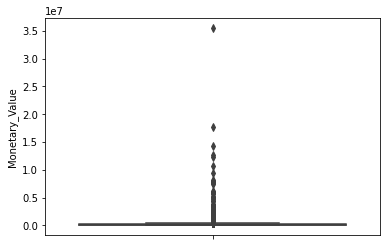

In [53]:
sns.boxplot(y='Monetary_Value',data=RFM_Table)

In [ ]:
#Outlier is there so Standard Scaler we have to use

In [54]:
from sklearn.preprocessing import StandardScaler
stdscaled=StandardScaler()
scaled_object=stdscaled.fit_transform(new_data)
scaled_object

array([[-0.88687668,  0.38379456,  0.37766904],
       [-0.16187726, -0.28413542,  0.03198725],
       [-0.73790419, -0.09022026, -0.0622685 ],
       ...,
       [-0.83721918, -0.34446458, -0.23919388],
       [-0.88687668,  2.84867167,  0.05905846],
       [-0.48961672, -0.09883872,  0.03830589]])

In [55]:
scaled_object=pd.DataFrame(scaled_object,index=RFM_Table.index,columns=new_data.columns)

In [56]:
scaled_object.head()

,Recency,Frequency,Monetary_Value
0,-0.886877,0.383795,0.377669
1,-0.161877,-0.284135,0.031987
2,-0.737904,-0.090220,-0.062268
3,2.162093,-0.331537,-0.219344
4,-0.559137,-0.038510,-0.091191


In [ ]:
#Build Clustering Model


In [57]:
from sklearn.cluster import KMeans
sum_of_sq_dist={}

for k in range(1,15):
    km=KMeans(n_clusters=k,init="k-means++",max_iter=300)
    km.fit(scaled_object)
    sum_of_sq_dist[k]=km.inertia_

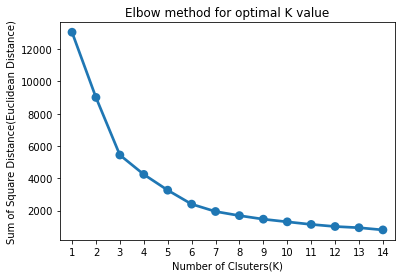

In [58]:
#Visualization for getting Elbow method (to find the actual K value)

sns.pointplot(x=list(sum_of_sq_dist.keys()),
              y=list(sum_of_sq_dist.values()))

plt.xlabel("Number of Clsuters(K)")
plt.ylabel("Sum of Square Distance(Euclidean Distance)")
plt.title("Elbow method for optimal K value")
plt.show()

In [59]:
km=KMeans(n_clusters=4,init="k-means++",max_iter=300)

In [60]:
y_kmeans=km.fit_predict(scaled_object)

In [61]:
y_kmeans

array([1, 1, 1, ..., 1, 1, 1])

In [62]:
RFM_Table['Cluster']=km.labels_
RFM_Table.head()

,index,CustomerID,Recency,Frequency,Monetary_Value,R,F,M,RMFGroup,RMF_Loyalty_Level,Cluster
0,0,2.0,4,182,553704.0,1,1,1,111,Diamond,1
1,1,3.0,77,27,257404.0,3,3,1,331,Gold,1
2,2,4.0,19,72,176613.0,2,2,2,222,Platinum,1
3,3,5.0,311,16,41976.0,4,4,3,443,Silver,0
4,4,6.0,37,84,151822.0,2,2,2,222,Platinum,1


In [63]:
RFM_Table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   index              4349 non-null   int64   
 1   CustomerID         4349 non-null   float64 
 2   Recency            4349 non-null   int64   
 3   Frequency          4349 non-null   int64   
 4   Monetary_Value     4349 non-null   float64 
 5   R                  4349 non-null   int64   
 6   F                  4349 non-null   int64   
 7   M                  4349 non-null   int64   
 8   RMFGroup           4349 non-null   int32   
 9   RMF_Loyalty_Level  4349 non-null   category
 10  Cluster            4349 non-null   int32   
dtypes: category(1), float64(2), int32(2), int64(6)
memory usage: 310.4 KB


In [64]:
RFM_Table.head(1)

,index,CustomerID,Recency,Frequency,Monetary_Value,R,F,M,RMFGroup,RMF_Loyalty_Level,Cluster
0,0,2.0,4,182,553704.0,1,1,1,111,Diamond,1


In [65]:
# Look at the centroids per cluster
centroid_df = RFM_Table.groupby('RMF_Loyalty_Level')[['Recency','Frequency','Monetary_Value',
                                          'CustomerID']].agg({'Recency':'mean',
                                                             'Frequency':'mean',
                                                             'Monetary_Value':'mean',
                                                             'CustomerID':'nunique'}).reset_index()

In [66]:
# look at the centroids per cluster
centroid_df = RFM_Table.groupby('Cluster')[['Recency', 'Frequency', 'Monetary_Value','CustomerID']].agg({'Recency': 'mean', 'Frequency': 'mean', 'Monetary_Value':'mean','CustomerID':'nunique'}).reset_index()
centroid_df = centroid_df.rename(columns = {'CustomerID':'NumBuyers'})
centroid_df

,Cluster,Recency,Frequency,Monetary_Value,NumBuyers
0,0,247.969863,28.026484,5.794158e+04,1095
1,1,41.416178,104.125965,2.375828e+05,3239
2,2,6.818182,1151.818182,1.216187e+07,11
3,3,2.500000,5889.500000,8.363220e+06,4


In [67]:
centroid_df['Percent'] = round(centroid_df['NumBuyers']/centroid_df.NumBuyers.sum()*100,2)
centroid_df

,Cluster,Recency,Frequency,Monetary_Value,NumBuyers,Percent
0,0,247.969863,28.026484,5.794158e+04,1095,25.18
1,1,41.416178,104.125965,2.375828e+05,3239,74.48
2,2,6.818182,1151.818182,1.216187e+07,11,0.25
3,3,2.500000,5889.500000,8.363220e+06,4,0.09


In [68]:
centroid_df_1 = RFM_Table.groupby('RMF_Loyalty_Level')[['Recency', 'Frequency', 'Monetary_Value','CustomerID']].agg({'Recency': 'mean', 'Frequency': 'mean', 'Monetary_Value':'sum','CustomerID':'nunique'}).reset_index()
centroid_df_1 = centroid_df_1.rename(columns = {'CustomerID':'NumBuyers'})
centroid_df_1

,RMF_Loyalty_Level,Recency,Frequency,Monetary_Value,NumBuyers
0,Diamond,9.003562,194.296527,579872041.0,1123
1,Platinum,32.140019,92.010407,219506552.0,1057
2,Gold,84.422509,52.216790,136331557.1,1084
3,Silver,248.997235,29.611060,64499989.0,1085


In [69]:
centroid_df_1['Percent'] = round(centroid_df_1['NumBuyers']/centroid_df_1.NumBuyers.sum()*100,2)
centroid_df_1

,RMF_Loyalty_Level,Recency,Frequency,Monetary_Value,NumBuyers,Percent
0,Diamond,9.003562,194.296527,579872041.0,1123,25.82
1,Platinum,32.140019,92.010407,219506552.0,1057,24.30
2,Gold,84.422509,52.216790,136331557.1,1084,24.93
3,Silver,248.997235,29.611060,64499989.0,1085,24.95


In [71]:
!pip install squarify


In [71]:
import squarify

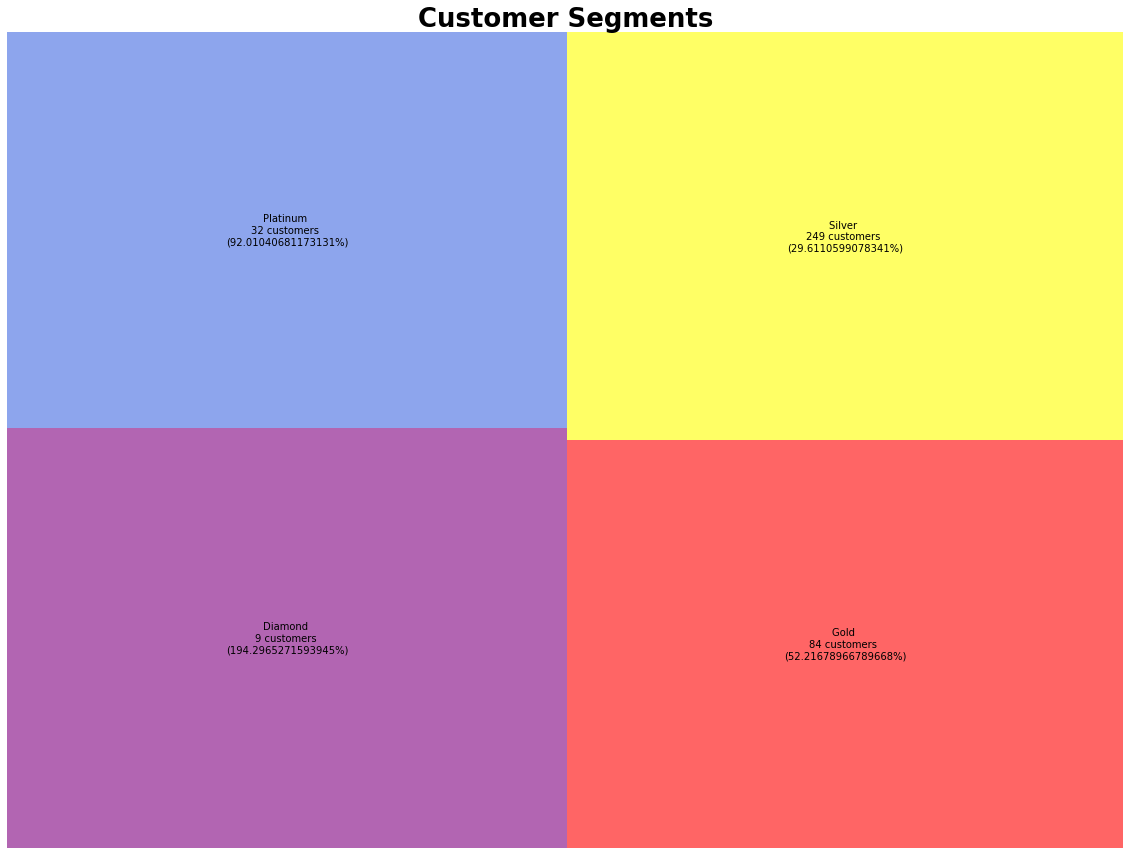

In [72]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20,15)
colors_dict ={'0': 'Purple','1':'royalblue','2':'red','3':'yellow'}

squarify.plot(sizes=centroid_df_1['NumBuyers'],
             color=colors_dict.values(),
             label=['{} \n{:.0f} customers \n({}%)'.format(*centroid_df_1.iloc[i])
             for i in range (0,len(centroid_df_1))], alpha=0.6)

plt.title("Customer Segments", fontsize=26, fontweight="bold")
plt.axis("off")

plt.show()

In [74]:
RFM_Table.to_excel('Ecommerce_Final_Output.xlsx')

In [75]:
os.getcwd()

'C:\\Users\\AMP\\Desktop\\Project\\E commerce'